In [15]:
from sklearn.neighbors import KernelDensity
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np

In [24]:
def kde_segment(samples, bandwidth):
    samples = np.copy(samples)
    samples.sort()
    diff = samples[-1] - samples[0]
    samples = samples.reshape(-1, 1)
    resolution = len(samples) * 10
    domain = np.linspace(samples[0], samples[-1], resolution)
    
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(samples)
    density = np.exp(kde.score_samples(domain.reshape(-1, 1)))

    minima = min(samples) + find_peaks(-density)[0] / resolution * diff
    print(minima)
    
    plt.figure(1)
    plt.scatter(samples, np.zeros((samples.shape[0],)))
    
    plt.figure(2)
    plt.plot(domain, density)
    
    segments = [[]]
    i = 0
    for s in samples:   
        if i < len(minima) and s >= minima[i]:
            segments.append([])
            i += 1
        segments[-1].append(s)
        
    print(segments)

[ 4.5        11.5        23.86666667 32.73333333]
[[array([1]), array([2]), array([3])], [array([6]), array([7]), array([8])], [array([15]), array([16]), array([17]), array([18])], [array([30]), array([30]), array([31])], [array([35]), array([36])]]
[ 1  2  3  6  7  8 15 16 17 18 30 30 31 35 36]


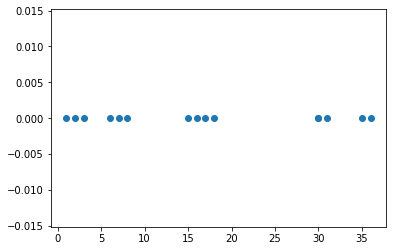

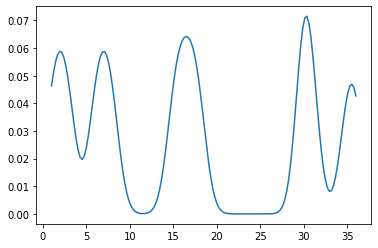

In [27]:
# samples = np.array([10, 11, 9, 23, 21, 11, 45, 20, 11, 12])
samples = np.array([1,2,3,6,7,8,15,16,17,18,30,30,31,35,36])

kde_segment(samples, 1)
print(samples)